In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt


In [2]:
 data = pd.read_csv("Data/Clean_Data_2021_server.csv")


In [3]:
data

,dob_yy,dob_mm,dob_tt,dob_wk,bfacil,mager,mbstate_rec,mrace31,mrace15,mhispx,...,ca_gast,ca_limb,ca_cleft,ca_clpal,ca_downs,ca_disor,ca_hypo,itran,ilive,bfed
0,2021,1,636.0,7,1.0,22,1.0,1,1,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,2021,1,259.0,7,1.0,31,1.0,22,15,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,2021,1,223.0,1,1.0,29,1.0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,2021,1,241.0,1,1.0,39,1.0,1,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,2021,1,503.0,1,1.0,20,2.0,5,13,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3665587,2021,12,1714.0,1,1.0,38,1.0,10,15,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3665588,2021,11,1700.0,7,7.0,34,1.0,2,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3665589,2021,12,1901.0,6,3.0,35,1.0,13,15,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
3665590,2021,12,242.0,7,1.0,36,1.0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665592 entries, 0 to 3665591
Data columns (total 96 columns):
 #   Column       Dtype  
---  ------       -----  
 0   dob_yy       int64  
 1   dob_mm       int64  
 2   dob_tt       float64
 3   dob_wk       int64  
 4   bfacil       float64
 5   mager        int64  
 6   mbstate_rec  float64
 7   mrace31      int64  
 8   mrace15      int64  
 9   mhispx       int64  
 10  dmar         int64  
 11  meduc        float64
 12  fagecomb     float64
 13  frace31      float64
 14  frace15      float64
 15  fhispx       int64  
 16  feduc        float64
 17  priorlive    float64
 18  priordead    float64
 19  priorterm    float64
 20  lbo_rec      float64
 21  tbo_rec      float64
 22  illb_r11     float64
 23  ilop_r11     float64
 24  ilp_r11      float64
 25  precare      float64
 26  previs       float64
 27  cig_0        float64
 28  cig_1        float64
 29  cig_2        float64
 30  cig_3        float64
 31  m_ht_in      int64  
 32

In [9]:
# sampled_data = data.sample(n=300000, random_state=42)


In [4]:
physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs:", len(physical_devices))

Num GPUs: 0


In [5]:
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    tf.config.set_visible_devices(physical_devices[0], 'GPU')
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    print("GPU is being used.")
else:
    print("No GPU is available.")

No GPU is available.


In [12]:
!nvidia-smi

Wed May 24 14:08:41 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 520.61.05    Driver Version: 520.61.05    CUDA Version: 11.8     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-PCI...  On   | 00000000:37:00.0 Off |                    0 |
| N/A   74C    P0    54W / 250W |  39556MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [13]:
# data = sampled_data

In [6]:
# Drop rows with missing values
data.dropna(inplace=True)

# Split the data into input (X) and output (y) variables
X = data.drop(['apgar5'], axis=1)
y = data['apgar5']


# Convert categorical variables into numerical values
X = pd.get_dummies(X)

# Normalize numerical variables
scaler = StandardScaler()
for col in X.columns:
    if X[col].dtype == 'float64' or X[col].dtype == 'int64':
        X[col] = scaler.fit_transform(X[[col]])




In [9]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [43]:
#Basoc model:

In [10]:
# Define the model architecture
model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='linear')
])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                6144      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 10,369
Trainable params: 10,369
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')  # Use appropriate optimizer and loss function

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32,validation_data=(X_val, y_val))  # Replace X_train and y_train with your training data


# Further post-processing or analysis as needed

Epoch 1/10
52720/52720 [==============================] - 78s 1ms/step - loss: 0.4178 - val_loss: 0.4143
Epoch 2/10
52720/52720 [==============================] - 77s 1ms/step - loss: 0.4162 - val_loss: 0.4194
Epoch 3/10
52720/52720 [==============================] - 77s 1ms/step - loss: 0.4150 - val_loss: 0.4126
Epoch 4/10
52720/52720 [==============================] - 79s 2ms/step - loss: 0.4144 - val_loss: 0.4125
Epoch 5/10
52720/52720 [==============================] - 81s 2ms/step - loss: 0.4139 - val_loss: 0.4161
Epoch 6/10
52720/52720 [==============================] - 83s 2ms/step - loss: 0.4132 - val_loss: 0.4117
Epoch 7/10
52720/52720 [==============================] - 81s 2ms/step - loss: 0.4129 - val_loss: 0.4126
Epoch 8/10
52720/52720 [==============================] - 81s 2ms/step - loss: 0.4122 - val_loss: 0.4113
Epoch 9/10
52720/52720 [==============================] - 82s 2ms/step - loss: 0.4118 - val_loss: 0.4134
Epoch 10/10
52720/52720 [==============================

In [19]:
# Make predictions
predictions = model.predict(X)  # Replace X_new with new data to predict Apgar scores

In [21]:
import numpy as np

In [22]:
# Compute additional evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

# Calculate mean squared error (MSE)
mse = mean_squared_error(y, predictions)

# Calculate R-squared score
r2 = r2_score(y, predictions)

# Calculate explained variance score
explained_variance = explained_variance_score(y, predictions)

std = np.std(y)

# Print the additional evaluation metrics
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")
print(f"Explained Variance Score: {explained_variance:.2f}")
print(f"Target function Std: {std:.2f}")


Mean Squared Error: 0.41
R-squared Score: 0.20
Explained Variance Score: 0.20
Target function Std: 0.72


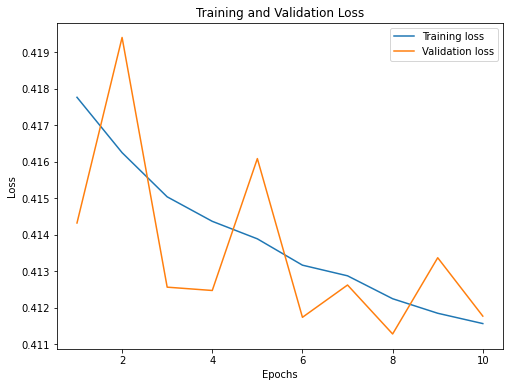

In [23]:
import matplotlib.pyplot as plt

# Get the training and validation loss from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Set the figure size to 8 inches wide and 6 inches tall
plt.figure(figsize=(8, 6))

# Plot the training and validation loss
plt.plot(epochs, train_loss, label="Training loss")
plt.plot(epochs, val_loss, label="Validation loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [ ]:
#second model - cahnging model architecture

In [25]:
model = tf.keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='linear')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 128)               12288     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_9 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 33        
Total params: 22,657
Trainable params: 22,657
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')  # Use appropriate optimizer and loss function

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32,validation_data=(X_val, y_val))  # Replace X_train and y_train with your training data

Epoch 1/10
52720/52720 [==============================] - 90s 2ms/step - loss: 0.4823 - val_loss: 0.4190
Epoch 2/10
52720/52720 [==============================] - 89s 2ms/step - loss: 0.4177 - val_loss: 0.4183
Epoch 3/10
52720/52720 [==============================] - 89s 2ms/step - loss: 0.4161 - val_loss: 0.4140
Epoch 4/10
52720/52720 [==============================] - 90s 2ms/step - loss: 0.4155 - val_loss: 0.4154
Epoch 5/10
52720/52720 [==============================] - 91s 2ms/step - loss: 0.4146 - val_loss: 0.4159
Epoch 6/10
52720/52720 [==============================] - 90s 2ms/step - loss: 0.4141 - val_loss: 0.4130
Epoch 7/10
52720/52720 [==============================] - 90s 2ms/step - loss: 0.4137 - val_loss: 0.4202
Epoch 8/10
52720/52720 [==============================] - 88s 2ms/step - loss: 0.4132 - val_loss: 0.4142
Epoch 9/10
52720/52720 [==============================] - 84s 2ms/step - loss: 0.4115 - val_loss: 0.4165
Epoch 10/10
52720/52720 [==============================

In [34]:
predictions = model.predict(X)  # Replace X_new with new data to predict Apgar scores

In [30]:
# Compute additional evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

# Calculate mean squared error (MSE)
mse = mean_squared_error(y, predictions)

# Calculate R-squared score
r2 = r2_score(y, predictions)

# Calculate explained variance score
explained_variance = explained_variance_score(y, predictions)

std = np.std(y)

# Print the additional evaluation metrics
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")
print(f"Explained Variance Score: {explained_variance:.2f}")
print(f"Target function Std: {std:.2f}")


Mean Squared Error: 0.41
R-squared Score: 0.21
Explained Variance Score: 0.21
Target function Std: 0.72


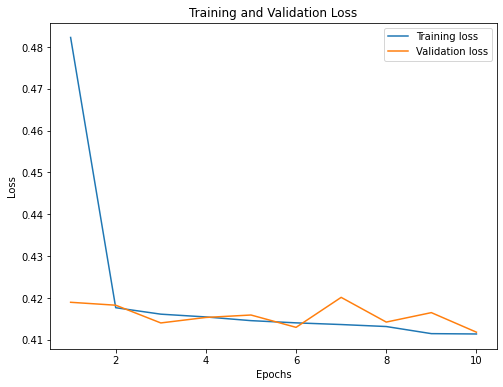

In [28]:
import matplotlib.pyplot as plt

# Get the training and validation loss from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Set the figure size to 8 inches wide and 6 inches tall
plt.figure(figsize=(8, 6))

# Plot the training and validation loss
plt.plot(epochs, train_loss, label="Training loss")
plt.plot(epochs, val_loss, label="Validation loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [30]:
#model 3 - regularization 

In [31]:
from tensorflow.keras.optimizers import Adam


In [32]:
# Define the model architecture
model = tf.keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='linear')
])

# Compile the model with a specific learning rate
learning_rate = 0.0001  # Adjust the learning rate
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mean_squared_error')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 128)               12288     
_________________________________________________________________
dense_12 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_13 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 33        
Total params: 22,657
Trainable params: 22,657
Non-trainable params: 0
_________________________________________________________________


In [33]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
52720/52720 [==============================] - 90s 2ms/step - loss: 0.8196 - val_loss: 0.4362
Epoch 2/10
52720/52720 [==============================] - 88s 2ms/step - loss: 0.4225 - val_loss: 0.4199
Epoch 3/10
52720/52720 [==============================] - 88s 2ms/step - loss: 0.4161 - val_loss: 0.4161
Epoch 4/10
52720/52720 [==============================] - 88s 2ms/step - loss: 0.4133 - val_loss: 0.4136
Epoch 5/10
52720/52720 [==============================] - 87s 2ms/step - loss: 0.4112 - val_loss: 0.4133
Epoch 6/10
52720/52720 [==============================] - 88s 2ms/step - loss: 0.4098 - val_loss: 0.4164
Epoch 7/10
52720/52720 [==============================] - 89s 2ms/step - loss: 0.4086 - val_loss: 0.4123
Epoch 8/10
52720/52720 [==============================] - 92s 2ms/step - loss: 0.4075 - val_loss: 0.4151
Epoch 9/10
52720/52720 [==============================] - 88s 2ms/step - loss: 0.4066 - val_loss: 0.4149
Epoch 10/10
52720/52720 [==============================

In [35]:
predictions = model.predict(X)  # Replace X_new with new data to predict Apgar scores

In [39]:
# Compute additional evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

# Calculate mean squared error (MSE)
mse = mean_squared_error(y, predictions)

# Calculate R-squared score
r2 = r2_score(y, predictions)

# Calculate explained variance score
explained_variance = explained_variance_score(y, predictions)

std = np.std(y)

# Print the additional evaluation metrics
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")
print(f"Explained Variance Score: {explained_variance:.2f}")
print(f"Target function Std: {std:.2f}")

Mean Squared Error: 0.40
R-squared Score: 0.22
Explained Variance Score: 0.22
Target function Std: 0.72


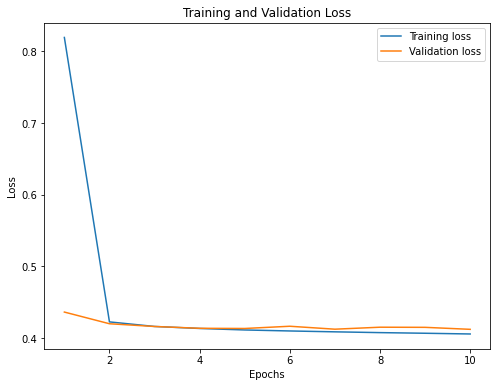

In [40]:
import matplotlib.pyplot as plt

# Get the training and validation loss from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Set the figure size to 8 inches wide and 6 inches tall
plt.figure(figsize=(8, 6))

# Plot the training and validation loss
plt.plot(epochs, train_loss, label="Training loss")
plt.plot(epochs, val_loss, label="Validation loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
#new model 2.5 - diffrent activation functions

In [41]:
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

In [42]:
model = tf.keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='tanh'),  # Use tanh activation function
    layers.Dense(32, activation='sigmoid'),  # Use sigmoid activation function
    layers.Dense(1, activation='linear')
])

# Compile the model with a specific learning rate
learning_rate = 0.001  # Adjust the learning rate
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mean_squared_error')
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 128)               12288     
_________________________________________________________________
dense_16 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_17 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 33        
Total params: 22,657
Trainable params: 22,657
Non-trainable params: 0
_________________________________________________________________


In [43]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
52720/52720 [==============================] - 90s 2ms/step - loss: 0.5214 - val_loss: 0.4193
Epoch 2/10
52720/52720 [==============================] - 90s 2ms/step - loss: 0.4144 - val_loss: 0.4216
Epoch 3/10
52720/52720 [==============================] - 89s 2ms/step - loss: 0.4142 - val_loss: 0.4155
Epoch 4/10
52720/52720 [==============================] - 90s 2ms/step - loss: 0.4151 - val_loss: 0.4164
Epoch 5/10
52720/52720 [==============================] - 91s 2ms/step - loss: 0.4155 - val_loss: 0.4207
Epoch 6/10
52720/52720 [==============================] - 90s 2ms/step - loss: 0.4149 - val_loss: 0.4156
Epoch 7/10
52720/52720 [==============================] - 89s 2ms/step - loss: 0.4154 - val_loss: 0.4152
Epoch 8/10
52720/52720 [==============================] - 89s 2ms/step - loss: 0.4170 - val_loss: 0.4179
Epoch 9/10
52720/52720 [==============================] - 89s 2ms/step - loss: 0.4181 - val_loss: 0.4167
Epoch 10/10
52720/52720 [==============================

In [44]:
# Compute additional evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

predictions = model.predict(X)  # Replace X_new with new data to predict Apgar scores
# Compute additional evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

# Calculate mean squared error (MSE)
mse = mean_squared_error(y, predictions)

# Calculate R-squared score
r2 = r2_score(y, predictions)

# Calculate explained variance score
explained_variance = explained_variance_score(y, predictions)

std = np.std(y)

# Print the additional evaluation metrics
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")
print(f"Explained Variance Score: {explained_variance:.2f}")
print(f"Target function Std: {std:.2f}")

Mean Squared Error: 0.42
R-squared Score: 0.19
Explained Variance Score: 0.19
Target function Std: 0.72


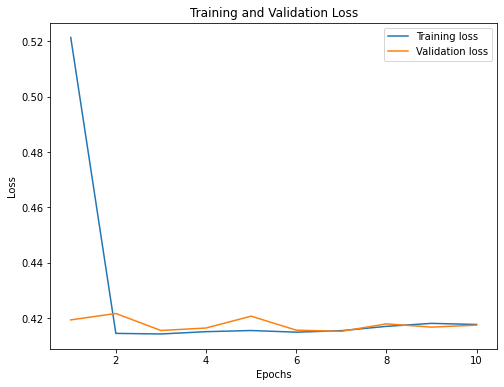

In [45]:
import matplotlib.pyplot as plt

# Get the training and validation loss from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Set the figure size to 8 inches wide and 6 inches tall
plt.figure(figsize=(8, 6))

# Plot the training and validation loss
plt.plot(epochs, train_loss, label="Training loss")
plt.plot(epochs, val_loss, label="Validation loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
#model 3 regularizion

In [46]:
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam


In [47]:
from tensorflow.keras import regularizers

# Define the model architecture with different regularization values
model = tf.keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),  # Adjust the L2 regularization strength
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),  # Adjust the L2 regularization strength
    layers.Dense(1, activation='linear')
])

# Compile the model
learning_rate = 0.0001  # Adjust the learning rate
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mean_squared_error')
model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 128)               12288     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 33        
Total params: 22,657
Trainable params: 22,657
Non-trainable params: 0
__________________________________________________

In [48]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
52720/52720 [==============================] - 98s 2ms/step - loss: 1.1792 - val_loss: 0.4499
Epoch 2/10
52720/52720 [==============================] - 98s 2ms/step - loss: 0.4374 - val_loss: 0.4237
Epoch 3/10
52720/52720 [==============================] - 100s 2ms/step - loss: 0.4232 - val_loss: 0.4175
Epoch 4/10
52720/52720 [==============================] - 97s 2ms/step - loss: 0.4183 - val_loss: 0.4155
Epoch 5/10
52720/52720 [==============================] - 97s 2ms/step - loss: 0.4158 - val_loss: 0.4148
Epoch 6/10
52720/52720 [==============================] - 98s 2ms/step - loss: 0.4142 - val_loss: 0.4126
Epoch 7/10
52720/52720 [==============================] - 98s 2ms/step - loss: 0.4134 - val_loss: 0.4133
Epoch 8/10
52720/52720 [==============================] - 98s 2ms/step - loss: 0.4123 - val_loss: 0.4117
Epoch 9/10
52720/52720 [==============================] - 97s 2ms/step - loss: 0.4119 - val_loss: 0.4131
Epoch 10/10
52720/52720 [=============================

In [49]:
predictions = model.predict(X)  # Replace X_new with new data to predict Apgar scores

In [50]:
# Compute additional evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

# Calculate mean squared error (MSE)
mse = mean_squared_error(y, predictions)

# Calculate R-squared score
r2 = r2_score(y, predictions)

# Calculate explained variance score
explained_variance = explained_variance_score(y, predictions)

std = np.std(y)

# Print the additional evaluation metrics
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")
print(f"Explained Variance Score: {explained_variance:.2f}")
print(f"Target function Std: {std:.2f}")

Mean Squared Error: 0.41
R-squared Score: 0.21
Explained Variance Score: 0.22
Target function Std: 0.72


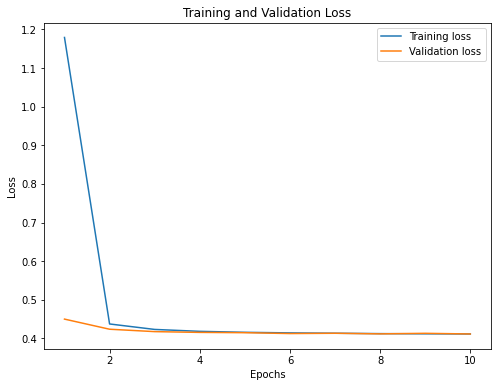

In [51]:
import matplotlib.pyplot as plt

# Get the training and validation loss from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Set the figure size to 8 inches wide and 6 inches tall
plt.figure(figsize=(8, 6))

# Plot the training and validation loss
plt.plot(epochs, train_loss, label="Training loss")
plt.plot(epochs, val_loss, label="Validation loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
#model 6 batch normalization 

In [52]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam

In [53]:


# Define the model architecture with batch normalization layers
model = tf.keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.2),
    BatchNormalization(),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.2),
    BatchNormalization(),
    layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1, activation='linear')
])

# Compile the model
learning_rate = 0.0001
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mean_squared_error')

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 128)               12288     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
dense_24 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dense_25 (Dense)             (None, 32)               

In [54]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_val, y_val))

Epoch 1/10
13180/13180 [==============================] - 45s 3ms/step - loss: 3.2106 - val_loss: 0.5441
Epoch 2/10
13180/13180 [==============================] - 44s 3ms/step - loss: 0.5976 - val_loss: 0.4964
Epoch 3/10
13180/13180 [==============================] - 44s 3ms/step - loss: 0.5385 - val_loss: 0.4730
Epoch 4/10
13180/13180 [==============================] - 44s 3ms/step - loss: 0.5058 - val_loss: 0.4610
Epoch 5/10
13180/13180 [==============================] - 44s 3ms/step - loss: 0.4829 - val_loss: 0.4511
Epoch 6/10
13180/13180 [==============================] - 47s 4ms/step - loss: 0.4671 - val_loss: 0.4442
Epoch 7/10
13180/13180 [==============================] - 44s 3ms/step - loss: 0.4555 - val_loss: 0.4376
Epoch 8/10
13180/13180 [==============================] - 44s 3ms/step - loss: 0.4469 - val_loss: 0.4343
Epoch 9/10
13180/13180 [==============================] - 44s 3ms/step - loss: 0.4408 - val_loss: 0.4323
Epoch 10/10
13180/13180 [==============================

In [55]:
predictions = model.predict(X)  # Replace X_new with new data to predict Apgar scores

In [56]:
# Compute additional evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

# Calculate mean squared error (MSE)
mse = mean_squared_error(y, predictions)

# Calculate R-squared score
r2 = r2_score(y, predictions)

# Calculate explained variance score
explained_variance = explained_variance_score(y, predictions)

std = np.std(y)

# Print the additional evaluation metrics
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")
print(f"Explained Variance Score: {explained_variance:.2f}")
print(f"Target function Std: {std:.2f}")

Mean Squared Error: 0.41
R-squared Score: 0.20
Explained Variance Score: 0.20
Target function Std: 0.72


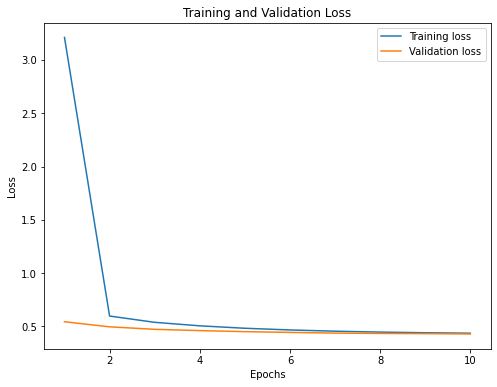

In [57]:
import matplotlib.pyplot as plt

# Get the training and validation loss from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Set the figure size to 8 inches wide and 6 inches tall
plt.figure(figsize=(8, 6))

# Plot the training and validation loss
plt.plot(epochs, train_loss, label="Training loss")
plt.plot(epochs, val_loss, label="Validation loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [58]:
#model 7 different activation functions

In [59]:
from tensorflow.keras.layers import Activation


In [60]:
# Define the model architecture

model = tf.keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='tanh'),  # Use tanh activation function
    layers.Dense(32, activation='sigmoid'),  # Use sigmoid activation function
    layers.Dense(1, activation='linear')
])

# Compile the model with a specific learning rate
learning_rate = 0.001  # Adjust the learning rate
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mean_squared_error')
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 128)               12288     
_________________________________________________________________
dense_28 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_29 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 33        
Total params: 22,657
Trainable params: 22,657
Non-trainable params: 0
_________________________________________________________________


In [61]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
52720/52720 [==============================] - 88s 2ms/step - loss: 0.4796 - val_loss: 0.4144
Epoch 2/10
52720/52720 [==============================] - 87s 2ms/step - loss: 0.4139 - val_loss: 0.4172
Epoch 3/10
52720/52720 [==============================] - 86s 2ms/step - loss: 0.4138 - val_loss: 0.4168
Epoch 4/10
52720/52720 [==============================] - 86s 2ms/step - loss: 0.4143 - val_loss: 0.4174
Epoch 5/10
52720/52720 [==============================] - 86s 2ms/step - loss: 0.4141 - val_loss: 0.4145
Epoch 6/10
52720/52720 [==============================] - 85s 2ms/step - loss: 0.4146 - val_loss: 0.4154
Epoch 7/10
52720/52720 [==============================] - 85s 2ms/step - loss: 0.4146 - val_loss: 0.4161
Epoch 8/10
52720/52720 [==============================] - 87s 2ms/step - loss: 0.4166 - val_loss: 0.4240
Epoch 9/10
52720/52720 [==============================] - 86s 2ms/step - loss: 0.4182 - val_loss: 0.4201
Epoch 10/10
52720/52720 [==============================

In [62]:
predictions = model.predict(X)  # Replace X_new with new data to predict Apgar scores

In [63]:
import numpy as np

In [64]:
# Compute additional evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

# Calculate mean squared error (MSE)
mse = mean_squared_error(y, predictions)

# Calculate R-squared score
r2 = r2_score(y, predictions)

# Calculate explained variance score
explained_variance = explained_variance_score(y, predictions)

std = np.std(y)

# Print the additional evaluation metrics
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")
print(f"Explained Variance Score: {explained_variance:.2f}")
print(f"Target function Std: {std:.2f}")

Mean Squared Error: 0.42
R-squared Score: 0.19
Explained Variance Score: 0.19
Target function Std: 0.72


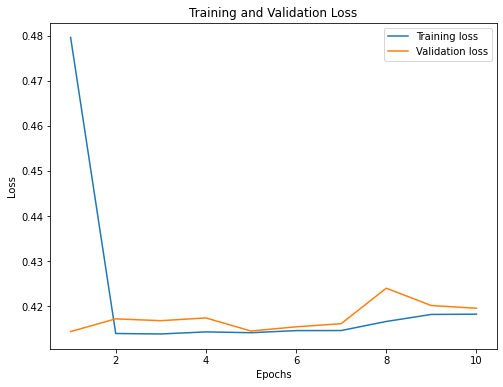

In [65]:
import matplotlib.pyplot as plt

# Get the training and validation loss from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Set the figure size to 8 inches wide and 6 inches tall
plt.figure(figsize=(8, 6))

# Plot the training and validation loss
plt.plot(epochs, train_loss, label="Training loss")
plt.plot(epochs, val_loss, label="Validation loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
#better results with this architecture

In [ ]:
#adding more layers to this model

In [66]:
# Define the model architecture with additional layers
model = tf.keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='tanh'),  # Use tanh activation function
    layers.Dense(32, activation='sigmoid'),  # Use sigmoid activation function
    layers.Dense(16, activation='relu'),  # Additional dense layer with relu activation
    layers.Dense(8, activation='relu'),  # Additional dense layer with relu activation
    layers.Dense(1, activation='linear')
])

# Compile the model with a specific learning rate
learning_rate = 0.001  # Adjust the learning rate
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mean_squared_error')
model.summary()


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 128)               12288     
_________________________________________________________________
dense_32 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_33 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_34 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_35 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 9         
Total params: 23,297
Trainable params: 23,297
Non-trainable params: 0
__________________________________________________

In [67]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
52720/52720 [==============================] - 99s 2ms/step - loss: 0.5296 - val_loss: 0.4175
Epoch 2/10
52720/52720 [==============================] - 98s 2ms/step - loss: 0.4159 - val_loss: 0.4179
Epoch 3/10
52720/52720 [==============================] - 98s 2ms/step - loss: 0.4157 - val_loss: 0.4136
Epoch 4/10
52720/52720 [==============================] - 98s 2ms/step - loss: 0.4155 - val_loss: 0.4172
Epoch 5/10
52720/52720 [==============================] - 97s 2ms/step - loss: 0.4156 - val_loss: 0.4164
Epoch 6/10
52720/52720 [==============================] - 97s 2ms/step - loss: 0.4165 - val_loss: 0.4154
Epoch 7/10
52720/52720 [==============================] - 97s 2ms/step - loss: 0.4166 - val_loss: 0.4163
Epoch 8/10
52720/52720 [==============================] - 96s 2ms/step - loss: 0.4170 - val_loss: 0.4149
Epoch 9/10
52720/52720 [==============================] - 96s 2ms/step - loss: 0.4177 - val_loss: 0.4227
Epoch 10/10
52720/52720 [==============================

In [68]:
predictions = model.predict(X)  # Replace X_new with new data to predict Apgar scores

In [69]:
# Compute additional evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

# Calculate mean squared error (MSE)
mse = mean_squared_error(y, predictions)

# Calculate R-squared score
r2 = r2_score(y, predictions)

# Calculate explained variance score
explained_variance = explained_variance_score(y, predictions)
std = np.std(y)

# Print the additional evaluation metrics
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

print(f"Explained Variance Score: {explained_variance:.2f}")
print(f"Target function Std: {std:.2f}")

Mean Squared Error: 0.42
R-squared Score: 0.19
Explained Variance Score: 0.19
Target function Std: 0.72


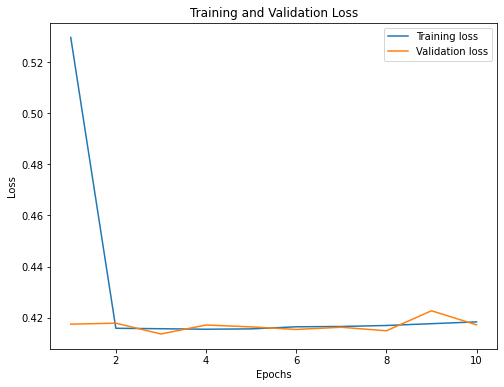

In [70]:
import matplotlib.pyplot as plt

# Get the training and validation loss from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Set the figure size to 8 inches wide and 6 inches tall
plt.figure(figsize=(8, 6))

# Plot the training and validation loss
plt.plot(epochs, train_loss, label="Training loss")
plt.plot(epochs, val_loss, label="Validation loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
# model 3 has to best preformce so far, now will fine tune model 3

In [76]:
# Define the model architecture
model = tf.keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='linear')
])

# Compile the model with a specific learning rate
learning_rate = 0.0001  # Adjust the learning rate
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mean_squared_error')
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 128)               12288     
_________________________________________________________________
dense_42 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_43 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 33        
Total params: 22,657
Trainable params: 22,657
Non-trainable params: 0
_________________________________________________________________


In [77]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/10
26360/26360 [==============================] - 47s 2ms/step - loss: 0.9817 - val_loss: 0.4367
Epoch 2/10
26360/26360 [==============================] - 46s 2ms/step - loss: 0.4277 - val_loss: 0.4286
Epoch 3/10
26360/26360 [==============================] - 47s 2ms/step - loss: 0.4188 - val_loss: 0.4178
Epoch 4/10
26360/26360 [==============================] - 47s 2ms/step - loss: 0.4148 - val_loss: 0.4186
Epoch 5/10
26360/26360 [==============================] - 47s 2ms/step - loss: 0.4094 - val_loss: 0.4134
Epoch 8/10
26360/26360 [==============================] - 47s 2ms/step - loss: 0.4085 - val_loss: 0.4131
Epoch 9/10
26360/26360 [==============================] - 47s 2ms/step - loss: 0.4074 - val_loss: 0.4126
Epoch 10/10
26360/26360 [==============================] - 47s 2ms/step - loss: 0.4066 - val_loss: 0.4135


In [78]:
predictions = model.predict(X)  # Replace X_new with new data to predict Apgar scores

In [79]:
# Compute additional evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

# Calculate mean squared error (MSE)
mse = mean_squared_error(y, predictions)

# Calculate R-squared score
r2 = r2_score(y, predictions)

# Calculate explained variance score
explained_variance = explained_variance_score(y, predictions)

std = np.std(y)

# Print the additional evaluation metrics
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")
print(f"Explained Variance Score: {explained_variance:.2f}")
print(f"Target function Std: {std:.2f}")

Mean Squared Error: 0.41
R-squared Score: 0.21
Explained Variance Score: 0.22
Target function Std: 0.72


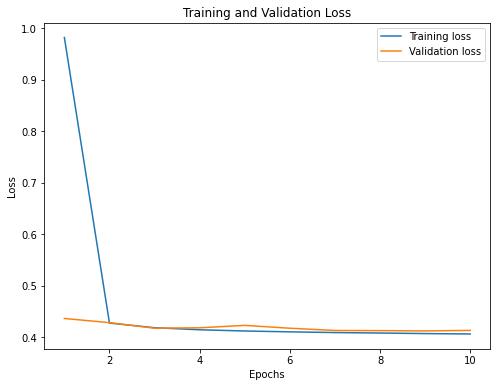

In [80]:
import matplotlib.pyplot as plt

# Get the training and validation loss from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Set the figure size to 8 inches wide and 6 inches tall
plt.figure(figsize=(8, 6))

# Plot the training and validation loss
plt.plot(epochs, train_loss, label="Training loss")
plt.plot(epochs, val_loss, label="Validation loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()